In [1]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model_name="deepseek-r1-distill-llama-70b",
    temperature=0
)
response=llm.invoke("what is length of wall of china?")

In [2]:
response

AIMessage(content="<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of kilometers, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or something like that, but I'm not sure if that's accurate.\n\nI should consider the different dynasties and how much each contributed to the wall. The Qin Dynasty, I think, was the first to build a long version of the wall, but it was probably not as extensive as later versions. Then the Han Dynasty might have extended it further. The most famous parts were probably built during the Ming Dynasty, which was much later.\n\nI also remember that the wall isn't a single continuous structure

In [3]:
response.content

"<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of kilometers, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or something like that, but I'm not sure if that's accurate.\n\nI should consider the different dynasties and how much each contributed to the wall. The Qin Dynasty, I think, was the first to build a long version of the wall, but it was probably not as extensive as later versions. Then the Han Dynasty might have extended it further. The most famous parts were probably built during the Ming Dynasty, which was much later.\n\nI also remember that the wall isn't a single continuous structure. There are sectio

In [4]:
from langchain.tools import tool

##  custom tools

In [5]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

## importing the inbuilt tool

In [9]:
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()

In [10]:
search.invoke("what is the latest update on iphone17 release?")

c:\Users\chand\anaconda3\envs\langgraph_env\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


"按我个人的理解，latest 这个词强调的是时间序列上最靠近现在，而 newest 强调的是新旧的问题。 比如说，苹果的 newest 产品，毫无疑问是 Mac Pro，这是去年才出现的东西，以前是没有的。 而苹果 … Breaking news from Hong Kong, China and Asia including geopolitics, diplomacy, economy, technology, lifestyle, entertainment and sport. Latest China news, opinions and analysis, covering Xi Jinping, Beijing's relations with Taiwan and China's tensions with the US. Hong Kong’s push for stablecoins and tokenised assets aims to solve global economic challenges, positioning the city as a leading fintech hub. 13 Jul 2025 - 12:00PMvideocam Stablecoins News, opinions, infographics and videos on China issues: geopolitics, diplomacy, economy, technology and lifestyle."

In [11]:
tools=[multiply, add, divide, search]

In [12]:
llm_with_tools=llm.bind_tools(tools)

In [13]:
response=llm_with_tools.invoke("hi")

In [14]:
response.content

'Hello! How can I assist you today?'

In [15]:
response.tool_calls

[]

In [16]:
response=llm_with_tools.invoke("what is 2+2?")

In [17]:
response.content

''

In [18]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'm99077dw9',
  'type': 'tool_call'}]

In [19]:
response=llm_with_tools.invoke("what is 10/2?")

In [20]:
response.content

''

In [21]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 10, 'b': 2},
  'id': '8fx33cm2j',
  'type': 'tool_call'}]

In [22]:
response=llm_with_tools.invoke("what is a current age of the TATA Group?")

In [23]:
response

AIMessage(content='', additional_kwargs={'reasoning_content': "Okay, so I need to figure out the current age of the TATA Group. I'm not exactly sure how old they are, but I know they're a big company, probably been around for a while. Let me think about how to approach this.\n\nFirst, I should probably look up when the TATA Group was founded. I remember hearing that it's an Indian company, and it's been in existence for over a century. Maybe I can find the exact year it was established. Once I have the founding year, I can subtract that from the current year to get the age.\n\nWait, but I'm not sure about the exact founding date. I think it was in the late 1800s or early 1900s. Let me try to recall. I believe it was founded by Jamsetji Tata. I think the group started with a textile mill, and then expanded into other industries like steel and hospitality.\n\nSo, if I can find the founding year, I can calculate the age. Let's say, for example, it was founded in 1868. That would make it 1

In [24]:
response.content

''

In [25]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'founding year of TATA Group'},
  'id': 'tkmaggq05',
  'type': 'tool_call'}]

In [39]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."

In [40]:
user_query=["tell me what is 2+2"]

In [41]:
[SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [42]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [43]:
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }
    
    

In [44]:
builder=StateGraph(MessagesState)

In [45]:
builder.add_node("llm_decision_step",function_1)

In [46]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x00000242D5621900>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x00000242D317E830>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x00000242D57029E0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [47]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [48]:
builder.add_edge(START,"llm_decision_step")

In [49]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
#instead of router function as earlier we can use in-built tools_condition function

In [50]:
builder.add_edge("tools","llm_decision_step")

In [51]:
react_graph=builder.compile()

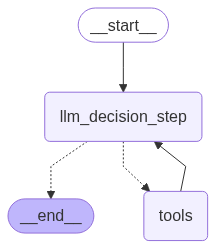

In [52]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [53]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]

In [54]:
react_graph.invoke({"messages":message})

c:\Users\chand\anaconda3\envs\langgraph_env\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='418d3359-f9f7-4f91-b72e-4ee768fe7c64'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, so the user is asking, "What is 2 times of narendramodi\'s age?" First, I need to figure out what exactly they\'re asking for. It seems like they want to multiply Narendra Modi\'s age by 2. \n\nTo do that, I need to find out how old Narendra Modi is. I don\'t have that information off the top of my head, so I should use the DuckDuckGo search tool to look it up. \n\nI\'ll call the duckduckgo_search function with the query "Narendra Modi age" to get the most accurate and up-to-date information. Once I have his age, I can then use the multiply function to calculate 2 times his age.\n\nI should make sure to handle any potential issues, like if the search doesn\'t return a clear age or if there\'s an error in the multiplication. But assuming everything goes s

In [55]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]

In [56]:
react_graph.invoke({"messages":message})

c:\Users\chand\anaconda3\envs\langgraph_env\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
c:\Users\chand\anaconda3\envs\langgraph_env\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='ba569204-ebee-435f-97e9-bf24bdff11c8'),
  AIMessage(content='', additional_kwargs={'reasoning_content': "Alright, so I need to figure out how much Elon Musk's net worth is and then divide that number by 2. First, I don't have the exact figure off the top of my head, so I should probably look it up. I remember that his net worth fluctuates a lot because it's tied to the stock prices of the companies he's involved with, like Tesla and SpaceX.\n\nI'll start by using the DuckDuckGo search tool to find the most recent estimate of Elon Musk's net worth. Once I have that number, I'll need to divide it by 2. Since dividing by 2 is the same as finding half of the number, I can use the divide function for this. I should make sure that the number I get from the search is accurate and up-to-date because net worth can change rapidly.\n\nAfter obtaining th

In [57]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]

In [58]:
response=react_graph.invoke({"messages":message})

In [59]:
response["messages"][-1].content

'The speed of light in meters per second is approximately 299,792,458 m/s. When multiplied by 10, the result is 2,997,924,580 m/s.\n\n**Step-by-Step Explanation:**\n\n1. **Identify the Speed of Light:** The speed of light in a vacuum is a well-known physical constant, approximately \\( 299,792,458 \\) meters per second (m/s).\n\n2. **Multiply by 10:** To find ten times the speed of light, you multiply the speed by 10.\n   \\[\n   299,792,458 \\, \\text{m/s} \\times 10 = 2,997,924,580 \\, \\text{m/s}\n   \\]\n\n3. **Present the Result:** The result of multiplying the speed of light by 10 is \\( 2,997,924,580 \\) m/s.\n\nThis calculation is straightforward as it involves a simple multiplication by 10, which merely adds a zero to the end of the number.'

In [60]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  multiply (dwyph2s5a)
 Call ID: dwyph2s5a
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: multiply

2997924580
================================== Ai Message ==================================

The speed of light in meters per second is approximately 299,792,458 m/s. When multiplied by 10, the result is 2,997,924,580 m/s.

**Step-by-Step Explanation:**

1. **Identify the Speed of Light:** The speed of light in a vacuum is a well-known physical constant, approximately \( 299,792,458 \) meters per second (m/s).

2. **Multiply by 10:** To find ten times the speed of light, you multiply the speed by 10.
   \[
   299,792,458 \, \text{m/s} \times 10 = 2,997,924,580 \, \text{m/s}
   \]

3. **

In [61]:
import yfinance as yf

In [62]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"
     
    

In [63]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $209.11.'

In [64]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $310.78.'

In [65]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x00000242D5621900>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x00000242D317E830>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x00000242D57029E0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [66]:
tools = [add, multiply, divide, search,get_stock_price]

In [67]:
llm_with_tools=llm.bind_tools(tools)

In [68]:
response=llm_with_tools.invoke("can you give me a latest stock price of adani greens?")

In [69]:
response.content

''

In [70]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': '4jhamzbq8',
  'type': 'tool_call'}]

In [71]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [72]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

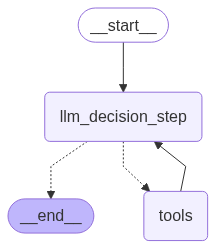

In [73]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))

In [74]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [75]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (03zp5zjgw)
 Call ID: 03zp5zjgw
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $209.11.
================================== Ai Message ==================================

The result of adding 1000 to the current stock price of Apple (AAPL) is **1209.11**.


In [80]:
# messages = [HumanMessage(content="can you give me 2 times of current stock price of Apple with the latest news of the Apple.")]
# messages = react_graph2.invoke({"messages": messages})

In [81]:
# for m in messages['messages']:
#     m.pretty_print()